In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cats_path = r"C:\Users\azsar\Desktop\training_set\cats"
dogs_path = r"C:\Users\azsar\Desktop\training_set\dogs"

In [3]:
output_path = r"C:\Users\azsar\Desktop\dogs_and_cats"

In [4]:
os.makedirs(output_path, exist_ok=True)
os.makedirs(os.path.join(output_path, 'cats'), exist_ok=True)
os.makedirs(os.path.join(output_path, 'dogs'), exist_ok=True)

In [5]:
from PIL import Image

In [6]:
def resize_and_normalize_image(image_path, target_size = (128, 128)):
    
    image = Image.open(image_path) # Görseli yükledim
    
    image = image.resize(target_size) # Yeniden boyutlandırdım
    
    image = np.array(image)
    
    image = image / 255.0
    
    return image

original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(original_image_rgb)
plt.title('Orijinal Resim')
plt.axis('off')
image.shape

In [7]:
def save_image(imageNP, save_path):
    
    image = Image.fromarray((imageNP * 255).astype(np.uint8))
    image.save(save_path)

In [8]:
def process_images_in_folder(inputFolder, outputFolder):
    
    for filename in os.listdir(inputFolder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(inputFolder, filename)
            processed_image = resize_and_normalize_image(image_path)
            save_path = os.path.join(outputFolder, filename)
            save_image(processed_image, save_path)

In [9]:
process_images_in_folder(cats_path, os.path.join(output_path, 'cats'))
process_images_in_folder(dogs_path, os.path.join(output_path, 'dogs'))

## Veri Artırma İşlemi

In [10]:
duzenlenmis_resimler_kedi=r"C:\Users\azsar\Desktop\dogs_and_cats\cats"
duzenlenmis_resimler_kopek=r"C:\Users\azsar\Desktop\dogs_and_cats\dogs"

artirilmis_output_path = r"C:\Users\azsar\Desktop\dogs_and_cats_artirilmis"
os.makedirs(artirilmis_output_path, exist_ok=True)


In [11]:
#toplam kedi fotoğrafı sayısı
len(os.listdir(duzenlenmis_resimler_kedi))

4000

In [12]:
#resmin boyutu
resim_yolu=r"C:\Users\azsar\Desktop\dogs_and_cats\cats\cat.1.jpg"
resim=cv2.imread(resim_yolu)
print(resim.shape)

(128, 128, 3)


(-0.5, 127.5, 127.5, -0.5)

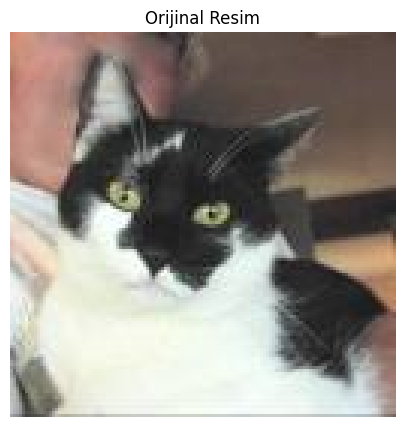

In [13]:
#orijinal resim
for image_name in os.listdir(duzenlenmis_resimler_kedi):
    image_path = os.path.join(duzenlenmis_resimler_kedi, image_name)
    image = cv2.imread(image_path)

    original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
plt.figure(figsize=(10, 5))
plt.imshow(original_image_rgb)
plt.title('Orijinal Resim')
plt.axis('off')

In [23]:
#3 farklı açıda döndürülmüş resimler
for image_name in os.listdir(duzenlenmis_resimler_kedi):
    image_path = os.path.join(duzenlenmis_resimler_kedi, image_name)
    image = cv2.imread(image_path)
    
    rows, cols, _ = image.shape
    merkez1 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 50, 1.5) #50 derece çevirme ve 1.5 kat zoom
    merkez2 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 180, 1) #180 derece çevirme
    merkez3 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 270, 1) #270 derece çevirme

    cevrilmis_resim1 = cv2.warpAffine(image, merkez1, (cols, rows)) 
    cevrilmis_resim2 = cv2.warpAffine(image, merkez2, (cols, rows))
    cevrilmis_resim3 = cv2.warpAffine(image, merkez3, (cols, rows))
    
    cevrilmis_resim_rgb1 = cv2.cvtColor(cevrilmis_resim1, cv2.COLOR_BGR2RGB) #çevrilen resimlere cv2 formatında renk ataması
    cevrilmis_resim_rgb2 = cv2.cvtColor(cevrilmis_resim2, cv2.COLOR_BGR2RGB)
    cevrilmis_resim_rgb3 = cv2.cvtColor(cevrilmis_resim3, cv2.COLOR_BGR2RGB)

    cv2.imwrite(os.path.join(artirilmis_output_path, f'{image_name}_donmus1.jpg'), cevrilmis_resim1) #çevrilen resimleri klasöre yazdırma
    cv2.imwrite(os.path.join(artirilmis_output_path, f'{image_name}_donmus2.jpg'), cevrilmis_resim2)
    cv2.imwrite(os.path.join(artirilmis_output_path, f'{image_name}_donmus3.jpg'), cevrilmis_resim3)

(-0.5, 127.5, 127.5, -0.5)

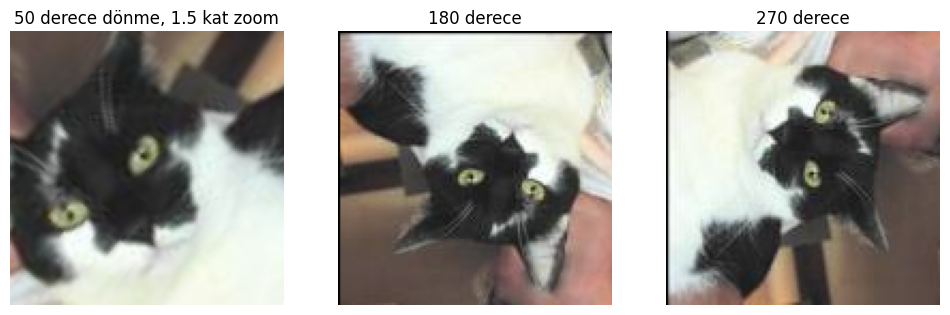

In [24]:
#çevrilen resimleri ekrana yazdırma
plt.figure(figsize=(12,12))   
plt.subplot(2, 3, 1)
plt.imshow(cevrilmis_resim_rgb1)
plt.title("50 derece dönme, 1.5 kat zoom")
plt.axis('off')
    
plt.subplot(2,3,2)
plt.imshow(cevrilmis_resim_rgb2)
plt.title('180 derece')
plt.axis('off')
    
plt.subplot(2, 3,3)
plt.imshow(cevrilmis_resim_rgb3)
plt.title('270 derece')
plt.axis('off')


(-0.5, 127.5, 127.5, -0.5)

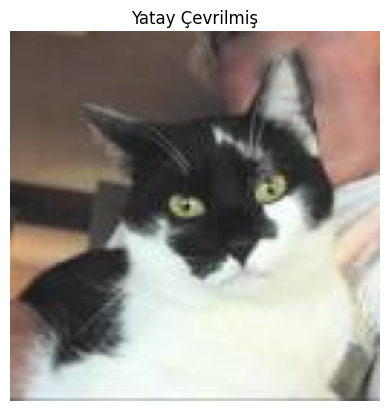

In [16]:
#resmi yatay olarak çevirme (ayna etkisi)
for image_name in os.listdir(duzenlenmis_resimler_kedi):
    image_path = os.path.join(duzenlenmis_resimler_kedi, image_name)
    image = cv2.imread(image_path)
    
    cevrilmis_resim = cv2.flip(image, 1)
    cevrilmis_resim_rgb = cv2.cvtColor(cevrilmis_resim, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(artirilmis_output_path, f'{image_name}_cevrilmis.jpg'), cevrilmis_resim)
    
plt.imshow(cevrilmis_resim_rgb)
plt.title('Yatay Çevrilmiş')
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

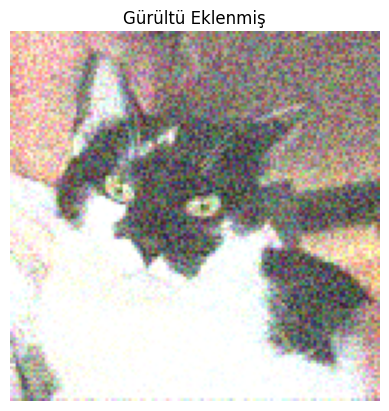

In [17]:
#resme gürültü ekleme 
for image_name in os.listdir(duzenlenmis_resimler_kedi):
    image_path = os.path.join(duzenlenmis_resimler_kedi, image_name)
    image = cv2.imread(image_path)
    
    gurultu = np.random.randint(0, 100, (rows, cols, 3), dtype='uint8')
    gurultulu_resim = cv2.add(image, gurultu)
    gurultulu_resim_rgb = cv2.cvtColor(gurultulu_resim, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join(artirilmis_output_path, f'{image_name}_gurultulu.jpg'), gurultulu_resim)

plt.imshow(gurultulu_resim_rgb)
plt.title('Gürültü Eklenmiş')
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

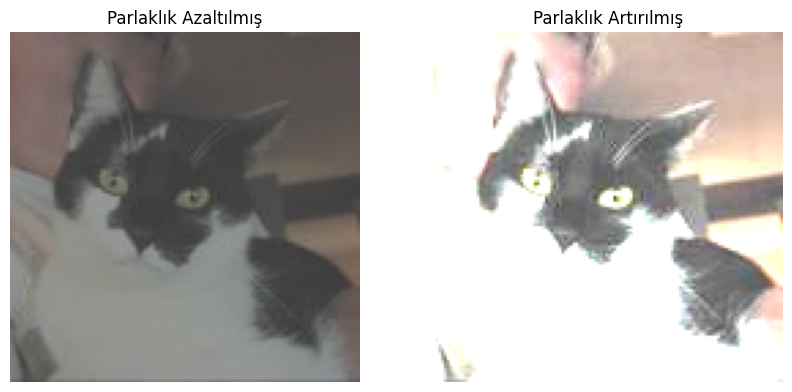

In [18]:
#resmi koyulaştırma ve parlaklaştırma
for image_name in os.listdir(duzenlenmis_resimler_kedi):
    image_path = os.path.join(duzenlenmis_resimler_kedi, image_name)
    image = cv2.imread(image_path)
    
    parlak_resim = cv2.convertScaleAbs(image, alpha=1.8, beta=45)
    parlak_resim_rgb = cv2.cvtColor(parlak_resim, cv2.COLOR_BGR2RGB)
    
    koyu_resim = cv2.convertScaleAbs(image, alpha=0.4, beta=50)
    koyu_resim_rgb = cv2.cvtColor(koyu_resim, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite(os.path.join(artirilmis_output_path, f'{image_name}_parlak.jpg'), parlak_resim)
    cv2.imwrite(os.path.join(artirilmis_output_path, f'{image_name}_koyu.jpg'), koyu_resim)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(koyu_resim_rgb)
plt.title('Parlaklık Azaltılmış')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(parlak_resim_rgb)
plt.title('Parlaklık Artırılmış')
plt.axis('off')

In [19]:
#resmi farklı oranlarda kırpma 
def random_crop(img, crop_size):
        h, w, _ = img.shape  # resim boyutlarına göre atama
        crop_h, crop_w = crop_size 
        top = np.random.randint(0, h - crop_h + 1) #atanan boyutlara göre kırpma
        left = np.random.randint(0, w - crop_w + 1)
        return img[top:top + crop_h, left:left + crop_w]
    
crop_sizes = [
        (int(rows * 0.5), int(cols * 0.5)),  # %50 oranında
        (int(rows * 0.6), int(cols * 0.6)),  # %60 oranında
        (int(rows * 0.7), int(cols * 0.7))   # %70 oranında
]

for image_name in os.listdir(duzenlenmis_resimler_kedi):
    image_path = os.path.join(duzenlenmis_resimler_kedi, image_name)
    image = cv2.imread(image_path)
    
    kirpilmis_resimler = [random_crop(image, size) for size in crop_sizes]
    kirpilmis_resimler_rgb = [cv2.cvtColor(kirpilmis_resim, cv2.COLOR_BGR2RGB) for kirpilmis_resim in kirpilmis_resimler]

    kirpilmis_resimler[0] = cv2.resize(kirpilmis_resimler[0], (128, 128)) #kırpılan resimleri tekrar ana boyuta ölçekleme 128x128
    kirpilmis_resimler[1] = cv2.resize(kirpilmis_resimler[1], (128, 128))
    kirpilmis_resimler[2] = cv2.resize(kirpilmis_resimler[2], (128, 128))

    for i, crop_size in enumerate(crop_sizes):
        cv2.imwrite(os.path.join(artirilmis_output_path, f'{image_name}_kirpilmis_{i}.jpg'), kirpilmis_resimler[i])

(76, 76, 3)

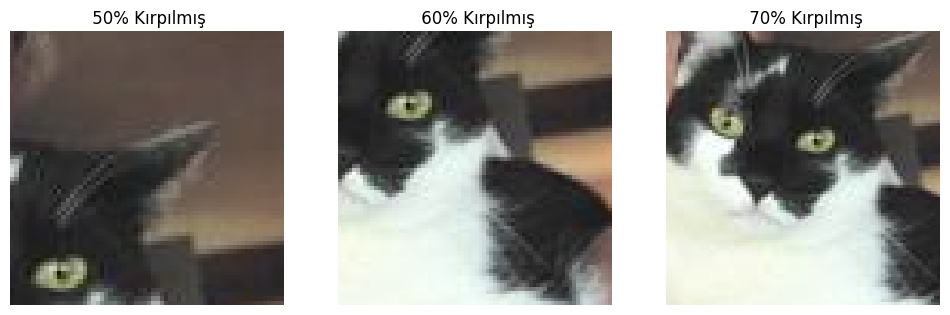

In [20]:
#ekrana yazdırma
plt.figure(figsize=(12,12))  
plt.subplot(2, 3, 1)
plt.imshow(kirpilmis_resimler_rgb[0])
plt.title(' 50% Kırpılmış')
plt.axis('off')
    
plt.subplot(2,3,2)
plt.imshow(kirpilmis_resimler_rgb[1])
plt.title(' 60% Kırpılmış')
plt.axis('off')
    
plt.subplot(2, 3,3)
plt.imshow(kirpilmis_resimler_rgb[2])
plt.title(' 70% Kırpılmış')
plt.axis('off')
kirpilmis_resimler_rgb[1].shape #kırpılan resmin boyutu ana resimle aynı


In [21]:
#artırım işlemleri sonrası toplam dosya sayısı
len(os.listdir(artirilmis_output_path))


40000

## Özet: İlk önce düzenleme işlemi ile tüm resimler aynı boyuta getirildi. Daha sonra artırma kısmında resimler kırpma, parlatma, döndürme, çevirme, gürültü ekleme gibi işlemlerden geçerek daha fazla resim üretilmiş oldu. Veri setinde az veri bulunması durumda bu işlemler sayesinde veriler çoğaltılabilir ve modeller daha iyi öğrenme yapabilir.
### orijinal resim sayısı: 4000
### artırılmış resim sayısı: 40000